# Project Report Update
Amanda Wang 1293711
# TripAdvisor Data Analysis

<img src="../image/logo.png">

Image: TripAdvisor

Here is a dataset about all the TripAdvisor-registered restaurants in 31 major European cities. 

TripAdvisor, Inc. is an American travel and restaurant website company that shows hotel and restaurant reviews, accommodation bookings and other travel-related content.It also includes interactive travel forums.

Headquartered in Needham, Massachusetts, TripAdvisor is the largest "social travel website" in the world, with about 315 million reviewers (active and inactive) and about 500 million reviews of hotels, restaurants, attractions and other travel-related businesses. TripAdvisor was an early adopter of user-generated content. The website services are free to users, who provide most of the content.

This data analysis can be helpful for TripAdvisor to improve its website service, for travellers to better plan food tasting, and for businessmen to seek opportunities to enter/expand in the European food market.

In [23]:
#Start from importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
from os import path
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

In [24]:
#First look into the structure of the dataset
ta = pd.read_csv("./TA_restaurants_curated.csv")
ta.head()

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


City: city location of the restaurant

Cuisine Style: cuisine style(s) of the restaurant, in a Python list object

Ranking: rank of the restaurant among the total number of restaurants in the city as a float object

Rating: rate of the restaurant on a scale from 1 to 5, as a float object 

Price Range: price range of the restaurant among 3 categories , as a categorical type 

Number of Reviews: number of reviews that customers have let to the restaurant, as a float object

Reviews: 2 reviews that are displayed on the restaurants scrolling page of the city, as a list of list object where the first list contains the 2 reviews, and the second le dates when these reviews were written

URL_TA: part of the URL of the detailed restaurant page that comes after 'www.tripadvisor.com' as a string object 

ID_TA: identification of the restaurant in the TA database constructed a one letter and a number



In [25]:
#To make the dataset clean and easy to analyse, I drop some meaningless column for this analysis and rename the columns

In [26]:
ta.columns = ['Unnamed:0', 'name', 'city', 'cuisine_style', 'ranking', 'rating', 'price_range', 'no_views', 'reviews', 'URL_TA', 'ID_TA']
ta = ta.drop(ta.columns[[0, 4, 9, 10]], axis=1)
ta.head()

,name,city,cuisine_style,rating,price_range,no_views,reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0..."
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau..."
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o..."
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience..."


## Understanding the Dataset

In [27]:
#Have a look at data types of each column
ta.dtypes

name              object
city              object
cuisine_style     object
rating           float64
price_range       object
no_views         float64
reviews           object
dtype: object

In [28]:
# Groupby by city
city = ta.groupby("city")

# Summary statistic of all cities
city.describe()

rating                                              no_views  \
              count      mean       std  min  25%  50%  75%  max    count   
city                                                                        
Amsterdam    3248.0  4.118381  0.615034 -1.0  4.0  4.0  4.5  5.0   3061.0   
Athens       1788.0  4.207774  0.611200 -1.0  4.0  4.5  4.5  5.0   1643.0   
Barcelona    7793.0  3.966829  0.716767 -1.0  3.5  4.0  4.5  5.0   7264.0   
Berlin       6373.0  4.127020  0.637292 -1.0  4.0  4.0  4.5  5.0   5800.0   
Bratislava    889.0  3.989314  0.790675  1.0  3.5  4.0  4.5  5.0    767.0   
Brussels     3012.0  3.890106  0.672224 -1.0  3.5  4.0  4.5  5.0   2838.0   
Budapest     2436.0  4.095854  0.683591  1.0  4.0  4.0  4.5  5.0   2229.0   
Copenhagen   1970.0  3.994670  0.702131 -1.0  3.5  4.0  4.5  5.0   1841.0   
Dublin       1955.0  4.051151  0.607394  1.0  4.0  4.0  4.5  5.0   1868.0   
Edinburgh    1760.0  4.056818  0.670086  1.0  3.5  4.0  4.5  5.0   1705.0   
Geneva       1409.0  3.969482  0.643580 -1.0  3.5  4.0  4.5  5.0   1300.0   
Hamburg      2737.0  4.030508  0.689230  1.0  3.5  4.0  4.5  5.0   2446.0   
Helsinki     1146.0  3.908813  0.652319  1.0  3.5  4.0  4.5  5.0   1069.0   
Krakow       1246.0  4.128812  0.678159 -1.0  4.0  4.0  4.5  5.0   1151.0   
Lisbon       3712.0  4.052128  0.644748  1.0  4.0  4.0  4.5  5.0   3466.0   
Ljubljana     468.0  4.128205  0.577612  2.0  4.0  4.0  4.5  5.0    434.0   
London      16435.0  3.942896  0.704354 -1.0  3.5  4.0  4.5  5.0  15352.0   
Luxembourg    623.0  3.909310  0.618090 -1.0  3.5  4.0  4.5  5.0    589.0   
Lyon         2669.0  3.920382  0.737548 -1.0  3.5  4.0  4.5  5.0   2552.0   
Madrid       8812.0  3.796698  0.746956 -1.0  3.5  4.0  4.5  5.0   8232.0   
Milan        6276.0  3.808955  0.665476 -1.0  3.5  4.0  4.0  5.0   5941.0   
Munich       2743.0  4.027525  0.617095 -1.0  3.5  4.0  4.5  5.0   2545.0   
Oporto       1492.0  4.152145  0.613105  1.0  4.0  4.0  4.5  5.0   1397.0   
Oslo         1138.0  3.899385  0.633796 -1.0  3.5  4.0  4.5  5.0   1074.0   
Paris       14000.0  3.948714  0.663977 -1.0  3.5  4.0  4.5  5.0  13280.0   
Prague       4172.0  4.013423  0.739710 -1.0  3.5  4.0  4.5  5.0   3711.0   
Rome         5949.0  4.232140  0.442834  3.0  4.0  4.0  4.5  5.0   5766.0   
Stockholm    2463.0  3.873528  0.659048  1.0  3.5  4.0  4.5  5.0   2266.0   
Vienna       3442.0  4.067984  0.641510 -1.0  4.0  4.0  4.5  5.0   3161.0   
Warsaw       2146.0  4.067102  0.667192  1.0  4.0  4.0  4.5  5.0   1941.0   
Zurich       1595.0  4.018495  0.615160  1.0  3.5  4.0  4.5  5.0   1494.0   

                                                                       
                  mean         std  min   25%    50%     75%      max  
city                                                                   
Amsterdam   135.394969  292.288164  2.0  12.0   44.0  138.00   6777.0  
Athens      101.603774  279.433629  2.0   7.0   21.0   74.00   4234.0  
Barcelona   140.493943  356.050968  2.0  10.0   34.0  124.00  10504.0  
Berlin       70.161552  197.811644  2.0   6.0   17.0   52.00   4452.0  
Bratislava   54.020860  165.151207  2.0   5.0   12.0   35.00   2578.0  
Brussels     93.299507  232.745600  2.0   9.0   31.0   94.00   6437.0  
Budapest    150.542396  396.286739  2.0   7.0   24.0  108.00   7575.0  
Copenhagen  101.785443  205.560972  2.0   9.0   31.0  103.00   3426.0  
Dublin      167.822270  353.450611  2.0  11.0   45.0  159.25   4453.0  
Edinburgh   235.803519  413.765344  2.0  15.0   71.0  281.00   5251.0  
Geneva       68.284615  131.037415  2.0  10.0   32.0   77.00   1836.0  
Hamburg      45.941946   91.678142  2.0   6.0   16.0   43.75   1327.0  
Helsinki     61.175865  119.663381  2.0   7.0   20.0   62.00   1488.0  
Krakow      139.545613  330.023484  2.0   8.0   29.0  114.00   4608.0  
Lisbon      131.356030  319.341513  2.0   9.0   32.0  112.00   7560.0  
Ljubljana    96.096774  230.926940  2.0   7.0   19.5   63.75   2533.0  
London      139.165646  34

Text(0.5, 1.0, 'Percent Missing by Variable')

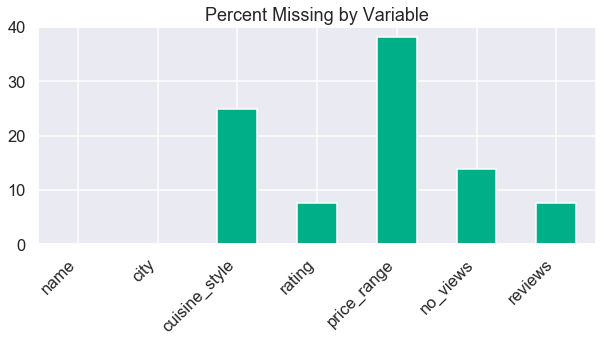

In [29]:
#Find out what percent of each variable is missing
f, ax = plt.subplots(figsize=(10,4))
((ta.isnull().sum()/len(ta)) * 100).plot(kind='bar', color = '#00af87')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Percent Missing by Variable')

Since there are 125,433 entries (restaurants) in this dataset, even for price range column, there are still more than 75,258 samples available. Hence, I decided not to drop the columns with missing variables.

In [30]:
#Make Price Range easier to understand
ta.price_range = ta.price_range.fillna('Unknown')
ta.price_range[ta.price_range == '$'] = 'Low'
ta.price_range[ta.price_range == '$$ - $$$'] = 'Medium'
ta.price_range[ta.price_range == '$$$$'] = 'High'
ta.head()

,name,city,cuisine_style,rating,price_range,no_views,reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",5.0,Medium,136.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,High,812.0,"[['Great food and staff', 'just perfect'], ['0..."
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,High,567.0,"[['Satisfaction', 'Delicious old school restau..."
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,High,564.0,"[['True five star dinner', 'A superb evening o..."
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,High,316.0,"[['Best meal.... EVER', 'super food experience..."


## A broad visulization of the dataset: Trends

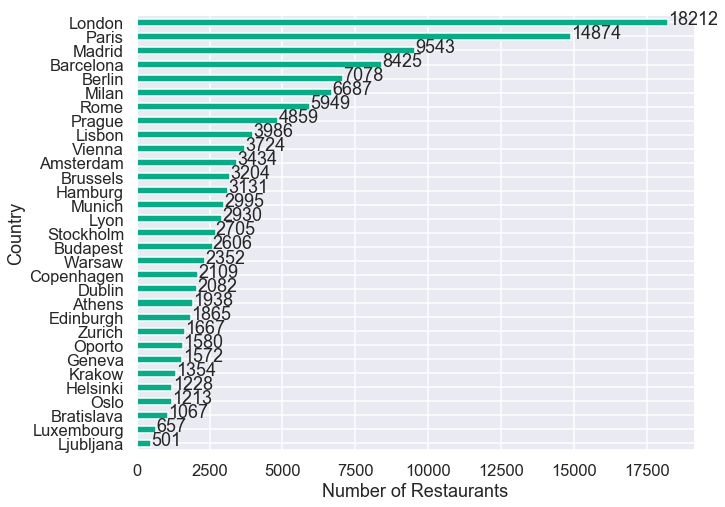

In [31]:
# Plot bar graph in descending order of the object value counts
plot1 = ta.city.value_counts().plot(kind='barh', figsize=(10,8), color = '#00af87')
plot1.invert_yaxis()

# Add labels
plot1.set_xlabel("Number of Restaurants")
plot1.set_ylabel("Country")

for i in plot1.patches:
    plot1.text(i.get_width()+10.0, i.get_y()+.38, str(i.get_width()))

In [32]:
#A look at average rating of a city's restaurant
rating_by_city = ta.groupby('city')
rating_by_city['rating'].mean()

city
Amsterdam     4.118381
Athens        4.207774
Barcelona     3.966829
Berlin        4.127020
Bratislava    3.989314
Brussels      3.890106
Budapest      4.095854
Copenhagen    3.994670
Dublin        4.051151
Edinburgh     4.056818
Geneva        3.969482
Hamburg       4.030508
Helsinki      3.908813
Krakow        4.128812
Lisbon        4.052128
Ljubljana     4.128205
London        3.942896
Luxembourg    3.909310
Lyon          3.920382
Madrid        3.796698
Milan         3.808955
Munich        4.027525
Oporto        4.152145
Oslo          3.899385
Paris         3.948714
Prague        4.013423
Rome          4.232140
Stockholm     3.873528
Vienna        4.067984
Warsaw        4.067102
Zurich        4.018495
Name: rating, dtype: float64

Text(0, 0.5, 'Average Rating of Restaurants')

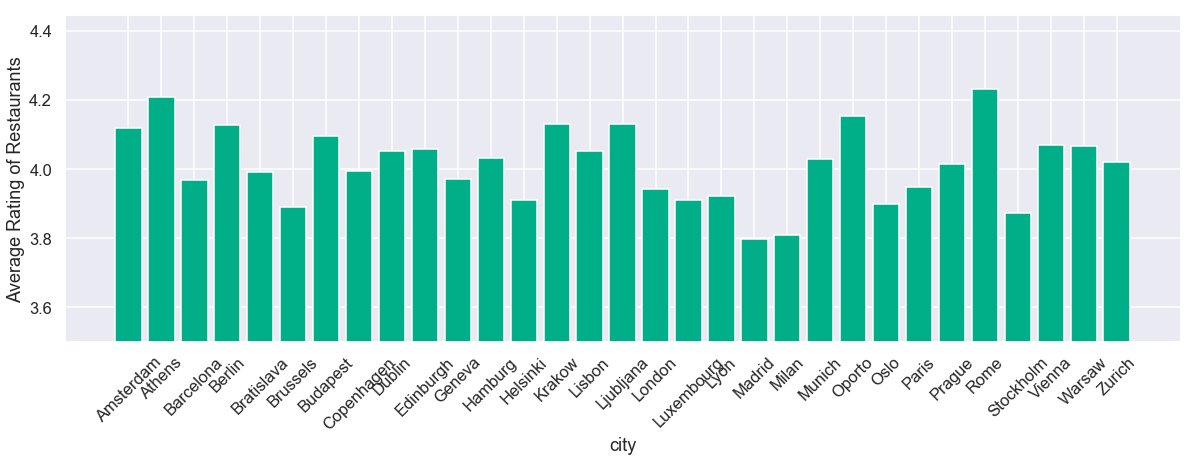

In [33]:
#Visualize the average ratings
x = list()
y = list()
for city in list(ta['city'].unique()):
    x.append(city)
    y.append(ta[ta['city'] == city]['rating'].mean())
fig, ax = plt.subplots(1,1,figsize=(20,6))
ax.bar(x,y,color = '#00af87')
ax.set_ylim(bottom=3.5)
ax.set_xticklabels(labels = x, rotation = 45)
ax.set_xlabel('city')
ax.set_ylabel('Average Rating of Restaurants')

The highest and the lowest: 
Rome 4.232140
Madrid 3.796698
Average is around 4 (not bad!)

In [34]:
ta.price_range.value_counts(normalize=True) * 100

Medium     43.305424
Unknown    38.123272
Low        15.140169
High        3.431134
Name: price_range, dtype: float64

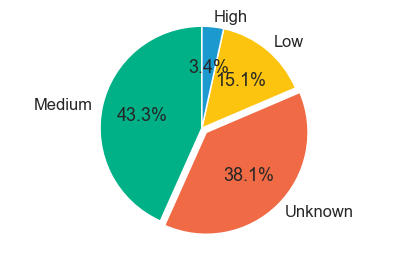

In [35]:
labels = ['Medium', 'Unknown', 'Low', 'High']
sizes = [43.31, 38.12, 15.14, 3.43]
# only "explode" the Unknown part
explode = (0, 0.06, 0, 0)
#add colors         
colors = ['#00B087','#ef6a45','#fcc40f','#1c99ce']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

Nearly 40% of the price range is unknown. This means either TripAdvisor need to develop a better price evaluation tool, or encourage customers to pick price range for the restaurants. Medium range is the largest among all the prices, and this can be the result of travellers - they do not want to spend too much on food in general but also they want solid quality food.

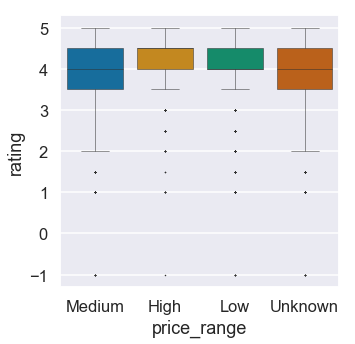

In [36]:
# How do customers rate based on price range
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="price_range", y="rating", data=ta, fliersize=0.5, linewidth=0.5, ax=ax)

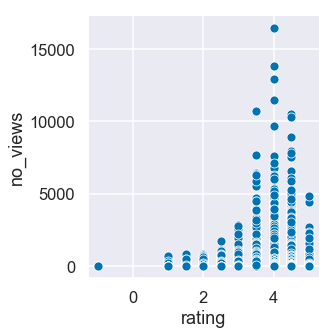

In [37]:
sns.relplot(x="rating", y="no_views", data=ta)

## A Detailed Visualization based on Cities

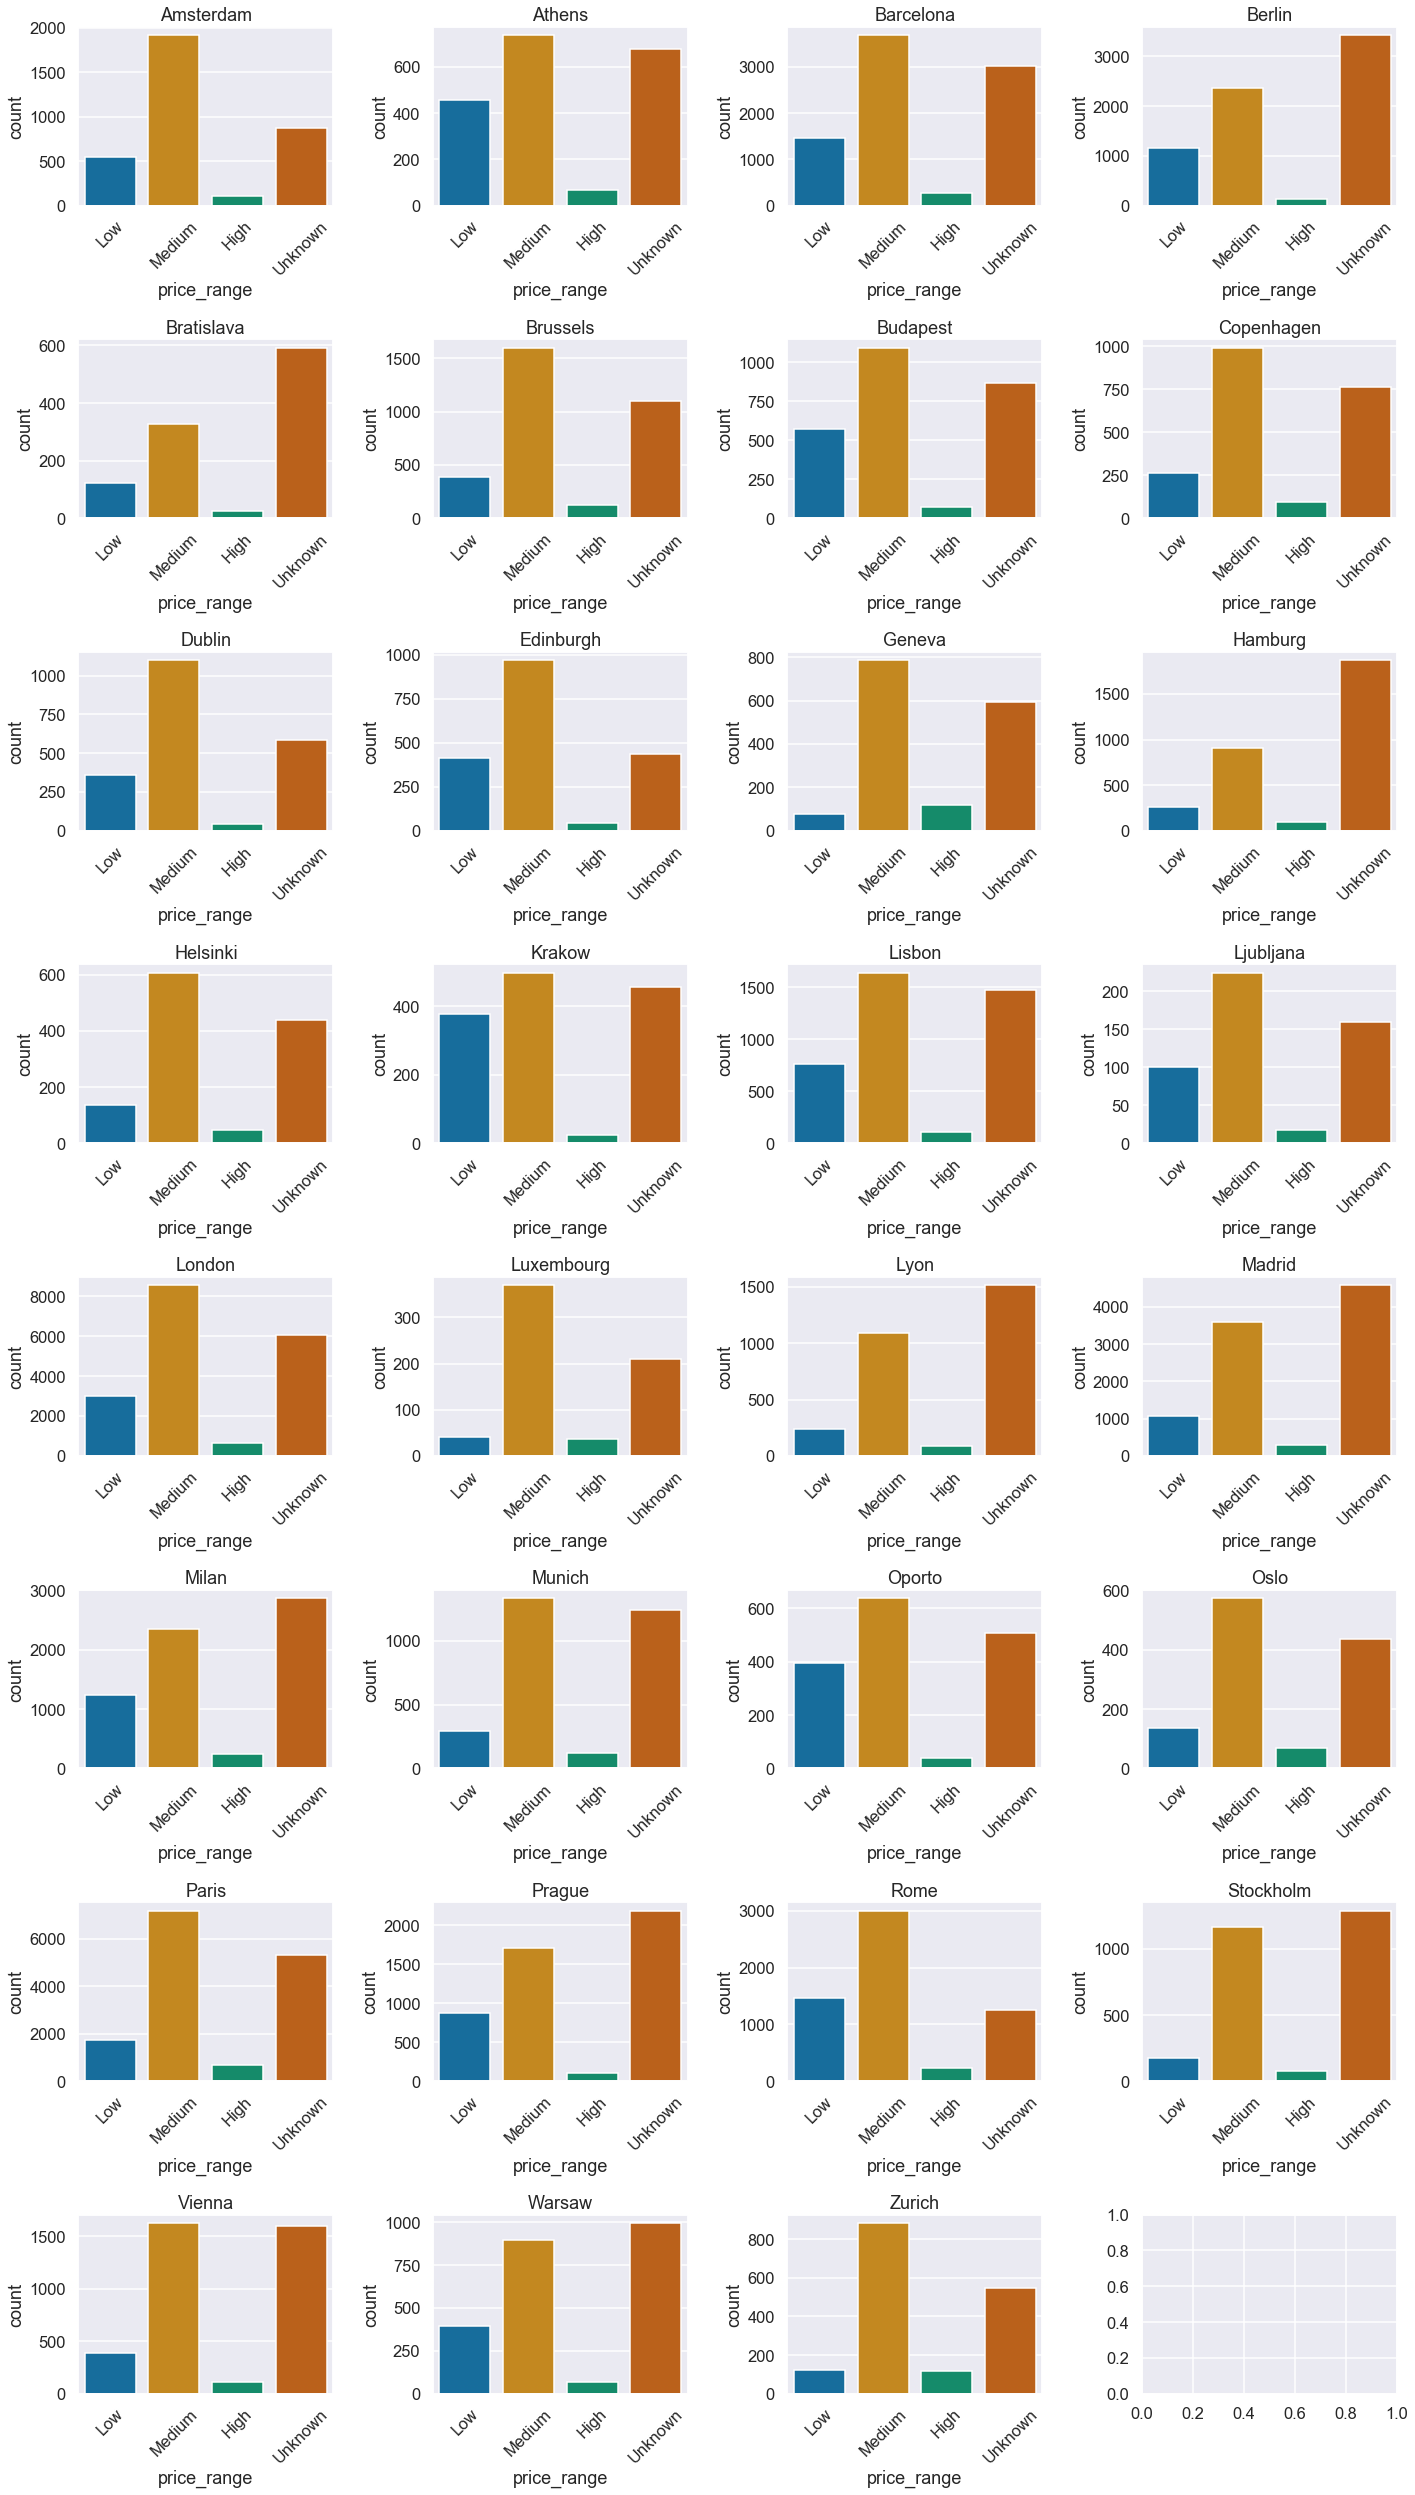

In [38]:
# Categorize into different price ranges and see how many restaurants are in each category
city = list(ta['city'].unique())
fig, axes = plt.subplots(nrows = 8,ncols = 4,figsize = (20,35))
i = 0

for c in city:
    reviews_city = ta[ta['city'] == c]
    plot = sns.countplot(x='price_range', order=['Low', 'Medium', 'High', 'Unknown'], data=reviews_city, ax=axes.flatten()[i])
    plot.set_title(c)
    plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
    plt.tight_layout()
    i = i + 1  

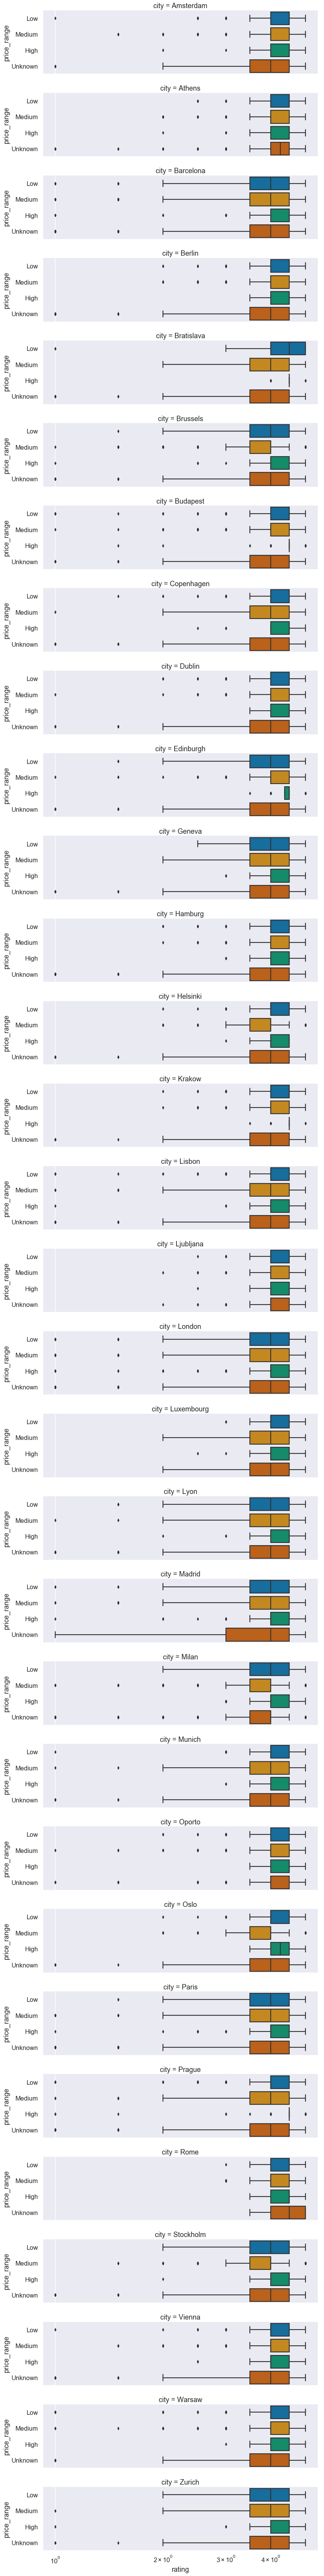

In [39]:
# Categorize into different price ranges and see how customers rate in each category
g = sns.catplot(x="rating", y="price_range", row="city", kind="box", orient="h", height=3, aspect=4, order=['Low', 'Medium', 'High', 'Unknown'], data=ta)
g.set(xscale="log")

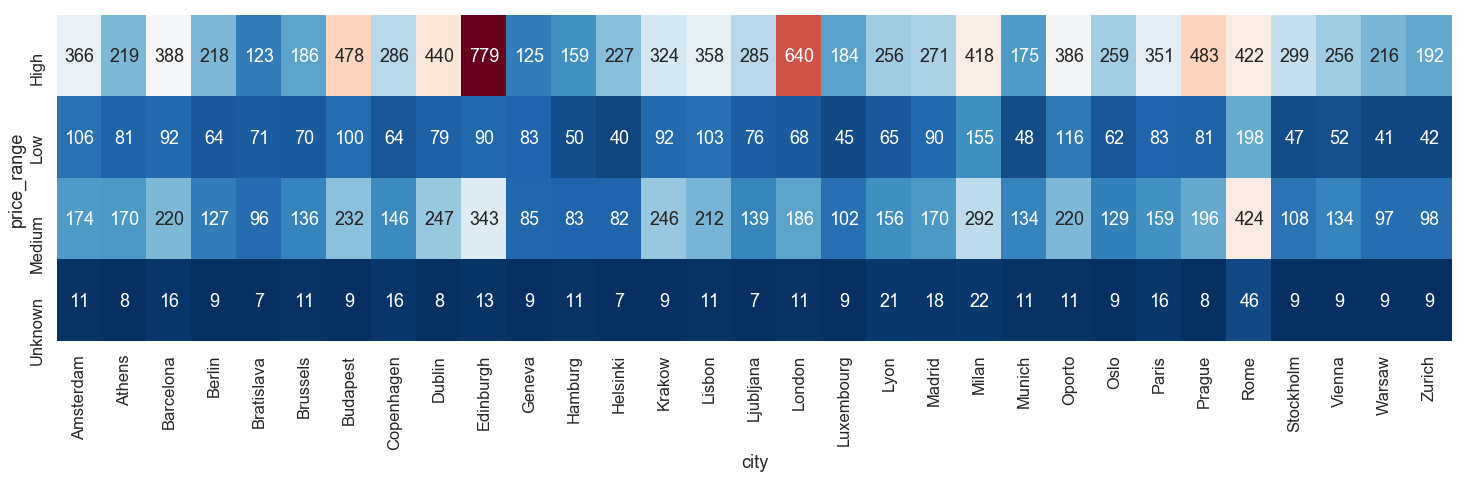

In [40]:
plt.subplots(figsize = (25,6))
sns.heatmap(ta.groupby(['price_range', 'city'])['no_views'].mean().unstack(), annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

Most popular: Edinburgh - high end; Least: Helsinki - low price

In [41]:
# from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# A wordcloud generated from reviews to get customers insight
# text = ta.reviews
# stopwords = ['2018', "2018'", 'Review', 'food', "Food'", 'meal', 'NaN', 'Best', 'Fantastic', 'of', 'and','just', 'like', 'Amazing', 'Fantastic' 'just', 'True', 'One', 'The', 'It', 'Excellent', 'Great', 'Superior', 'Delicious', 'Breakfast', "Breakfast'", 'dinner', "dinner'"]
# wordcloud = WordCloud(width = 1500, height = 1000, background_color = 'white', stopwords = stopwords).generate(str(text))
# fig = plt.figure(figsize = (40, 30), facecolor = '#00af87', edgecolor = '#00af87')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Travellers pay attention to the emotional funtions of a restaurant (If it feels like home/family, feels warm, etc.), and customer experience is one of the most important thing. 

## Next Step:
   1. Merge city population from api and analyse population and restaurant numbers/or ratings from google
   2. Machine Learning
   